In [9]:
import sys
from pyspark import SparkContext
from pyspark import SQLContext
from pyspark.sql.functions import *

sc = SparkContext()
sqlContext = SQLContext(sc)

In [10]:
rdd = sc.parallelize([(0,"This is a sample sentence, showing off the stop words filtration."), (0,"I hate shoe"), (0,"Shoe man Shu")])
df = sqlContext.createDataFrame(rdd, ["id", "names"])


In [11]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#word_tokenize accepts a string as an input, not a file. 
stop_words = stopwords.words('english') 
stop_words.extend(["This","I","chausson"])

shoe=""
for iteration in df.collect(): 
    shoe+=(iteration.names+" ") #gros tas de mots

word_tokens = word_tokenize(shoe) 
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
print (shoe)
print(filtered_sentence)


This is a sample sentence, showing off the stop words filtration. I hate shoe Shoe man Shu 
['sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.', 'hate', 'shoe', 'Shoe', 'man', 'Shu']


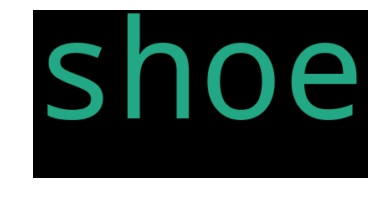

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=stop_words).generate("shoe shoe chausson")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()